In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sportsipy.ncaab.boxscore import Boxscore
from sportsipy.ncaab.boxscore import Boxscores
from sportsipy.ncaab.schedule import Schedule

In [2]:
df = pd.read_csv('NCAABasketballData.csv', low_memory = False)

In [3]:
df.columns

Index(['game_id', 'season', 'status', 'coverage', 'neutral_site',
       'scheduled_date', 'gametime', 'conference_game', 'tournament',
       'tournament_type',
       ...
       'a_fast_break_pts', 'a_second_chance_pts', 'a_team_turnovers',
       'a_points_off_turnovers', 'a_team_rebounds', 'a_flagrant_fouls',
       'a_player_tech_fouls', 'a_team_tech_fouls', 'a_coach_tech_fouls',
       'created'],
      dtype='object', length=132)

In [4]:
cols_to_drop = ['game_id', 'status','coverage','possession_arrow', 'venue_id',
                'venue_city','venue_state','venue_address','venue_zip','venue_country',
                'venue_name', 'created', 'h_league_id','h_league_name','h_league_alias',
                'h_conf_id','h_conf_name','h_conf_alias','h_division_id',
                'h_division_name','h_division_alias','h_logo_large','h_logo_medium',
                'h_logo_small','a_league_name','a_league_alias','a_conf_id',
                'a_conf_name','a_conf_alias','a_division_id','a_division_name',
                'a_division_alias','a_logo_large','a_logo_medium','a_logo_small','created']

In [5]:
df.tournament.value_counts()

Conference    1448
NCAA           712
Name: tournament, dtype: int64

In [6]:
df.columns

Index(['game_id', 'season', 'status', 'coverage', 'neutral_site',
       'scheduled_date', 'gametime', 'conference_game', 'tournament',
       'tournament_type',
       ...
       'a_fast_break_pts', 'a_second_chance_pts', 'a_team_turnovers',
       'a_points_off_turnovers', 'a_team_rebounds', 'a_flagrant_fouls',
       'a_player_tech_fouls', 'a_team_tech_fouls', 'a_coach_tech_fouls',
       'created'],
      dtype='object', length=132)

In [7]:
df['home_win'] = df.h_points_game.ge(df.a_points_game)

In [8]:
df['h_possessions'] = .5 * (df['h_field_goals_att'] + (.475 * df['h_free_throws_att']) - df['h_offensive_rebounds'] + df['h_turnovers'])
df['a_possessions'] = .5 * (df['a_field_goals_att'] + (.475 * df['a_free_throws_att']) - df['a_offensive_rebounds'] + df['a_turnovers'])

In [9]:
df['h_eFG_pct'] = (df['h_field_goals_made'] + (.5 * df['h_three_points_made'])) / df['h_field_goals_att']
df['a_eFG_pct'] = (df['a_field_goals_made'] + (.5 * df['a_three_points_made'])) / df['a_field_goals_att']

In [10]:
df['h_TS_pct'] = df['h_points_game'] / (2 * (df['h_field_goals_att'] + .475 * df['h_free_throws_att']))
df['a_TS_pct'] = df['a_points_game'] / (2 * (df['a_field_goals_att'] + .475 * df['a_free_throws_att']))

In [11]:
df['h_free_throw_rate'] = df['h_free_throws_att'] / df['h_field_goals_att']
df['a_free_throw_rate'] = df['a_free_throws_att'] / df['a_field_goals_att']

In [12]:
df['h_three_point_rate'] = df['h_three_points_att'] / (df['h_field_goals_att'] + (.475*df['h_free_throws_att']))
df['a_three_point_rate'] = df['a_three_points_att'] / (df['a_field_goals_att'] + (.475*df['a_free_throws_att']))

In [13]:
df['h_offensive_rebounds_pct'] = df['h_offensive_rebounds'] / (df['h_offensive_rebounds'] + df['a_defensive_rebounds'])
df['a_offensive_rebounds_pct'] = df['a_offensive_rebounds'] / (df['a_offensive_rebounds'] + df['h_defensive_rebounds'])

df['h_defensive_rebounds_pct'] = df['h_defensive_rebounds'] / (df['h_defensive_rebounds'] + df['a_offensive_rebounds'])
df['a_defensive_rebounds_pct'] = df['a_defensive_rebounds'] / (df['a_defensive_rebounds'] + df['h_offensive_rebounds'])

df['h_rebound_pct'] = df['h_rebounds'] / (df['h_rebounds'] + df['a_rebounds'])
df['a_rebound_pct'] = df['a_rebounds'] / (df['a_rebounds'] + df['h_rebounds']) 

In [14]:
df['h_assist_ratio'] = df['h_assists'] / df['h_field_goals_made']
df['a_assist_ratio'] = df['a_assists'] / df['a_field_goals_made']

In [15]:
df['h_steal_pct'] = df['h_steals'] / (df['a_field_goals_att'] + .475*df['a_free_throws_att'] + df['a_turnovers'])
df['a_steal_pct'] = df['a_steals'] / (df['h_field_goals_att'] + .475*df['h_free_throws_att'] + df['h_turnovers'])

In [16]:
df['h_block_pct'] = df['h_blocks'] / (df['a_field_goals_att'])
df['a_block_pct'] = df['a_blocks'] / (df['h_field_goals_att'])

In [17]:
df['h_turnover_ratio'] = df['h_turnovers'] / (df['h_field_goals_att'] + .475*df['h_free_throws_att'] + df['h_turnovers'])
df['a_turnover_ratio'] = df['a_turnovers'] / (df['a_field_goals_att'] + .475*df['a_free_throws_att'] + df['a_turnovers'])

In [18]:
df.groupby(['h_market','season']).sum()
df.groupby(['a_market','season']).sum()

attendance  lead_changes  times_tied  periods  \
a_market          season                                                  
Abilene Christian 2013       37738.0           2.0         1.0     31.0   
                  2014       27998.0          51.0        38.0     32.0   
                  2015       36431.0          53.0        51.0     32.0   
                  2016       32902.0          71.0        62.0     33.0   
                  2017       29498.0          76.0        43.0     36.0   
...                              ...           ...         ...      ...   
Youngstown State  2013       12869.0           0.0         0.0     35.0   
                  2014       36198.0          54.0        59.0     34.0   
                  2015       71777.0          63.0        54.0     37.0   
                  2016       76498.0         132.0       101.0     42.0   
                  2017       65285.0          58.0        53.0     40.0   

                          venue_capacity  h_points_game  h_rank  \
a_market          season                                          
Abilene Christian 2013          107773.0           1151       0   
                  2014          109029.0           1144       0   
                  2015          106290.0           1150       0   
                  2016           91009.0           1139       0   
                  2017          104862.0           1252      21   
...                                  ...            ...     ...   
Youngstown State  2013          111548.0           1276       0   
                  2014          128919.0           1248       0   
                  2015          158902.0           1494      11   
                  2016          217455.0           1641       0   
                  2017          174122.0           1702       0   

                          h_field_goals_made  h_field_goals_att  \
a_market          season                                          
Abilene Christian 2013                 119.0              219.0   
                  2014                 404.0              811.0   
                  2015                 405.0              801.0   
                  2016                 382.0              822.0   
                  2017                 423.0              918.0   
...                                      ...                ...   
Youngstown State  2013                  65.0              127.0   
                  2014                 428.0              963.0   
                  2015                 540.0             1129.0   
                  2016                 611.0             1312.0   
                  2017                 600.0             1164.0   

                          h_field_goals_pct  ...  h_rebound_pct  \
a_market          season                     ...                  
Abilene Christian 2013                215.1  ...       2.400758   
                  2014                803.2  ...       9.248739   
                  2015                759.0  ...       8.103147   
                  2016                699.6  ...       8.206710   
                  2017                788.7  ...       8.867159   
...                                     ...  ...            ...   
Youngstown State  2013                102.3  ...       1.173713   
                  2014                721.0  ...       9.053887   
                  2015                813.6  ...       9.878854   
                  2016                933.3  ...      10.709807   
                  2017               1032.1  ...      10.167464   

                          a_rebound_pct  h_assist_ratio  a_assist_ratio  \
a_market          season                                                  
Abilene Christian 2013         1.599242        2.164888        2.120455   
                  2014         6.751261        8.626413        8.620800   
                  2015         6.896853        8.103962        8.161900   
                  2016         6.793290        8.418384    

In [19]:
ncaa_tournament_data = df[df['tournament'] == 'NCAA']
ncaa_tournament_data = ncaa_tournament_data[ncaa_tournament_data['tournament_type'] != 'CIT']
ncaa_tournament_data = ncaa_tournament_data[ncaa_tournament_data['tournament_type'] != 'NIT']
ncaa_tournament_data = ncaa_tournament_data[ncaa_tournament_data['tournament_type'] != 'CBI']
ncaa_tournament_data.tournament_type.value_counts()

East Regional            75
South Regional           75
Midwest Regional         75
West Regional            75
First Four               20
Final Four               10
Iowa Bracket              7
Florida St. Bracket       7
SBON Bracket              7
SMU Bracket               7
Baylor Bracket            7
Notre Dame Bracket        7
Vegas 16                  7
Monmouth Bracket          7
Old Dominion Bracket      7
Temple Bracket            7
Minnesota Bracket         7
Colorado St. Bracket      7
USC Bracket               7
Illinois St Bracket       7
California Bracket        7
SCAR Bracket              7
Saint Mary's Bracket      7
Syracuse Bracket          7
Valparaiso Bracket        7
Richmond Bracket          7
St. John's Bracket        7
National Championship     5
Name: tournament_type, dtype: int64

In [20]:
df.home_win.value_counts(normalize = True)

True     0.647822
False    0.352178
Name: home_win, dtype: float64

In [21]:
df.groupby('conference_game').mean()['home_win']

conference_game
False    0.704692
True     0.601835
Name: home_win, dtype: float64

In [22]:
df.a_personal_fouls.corr(df['a_foulouts'])

0.28734198430175634

In [23]:
stats = ['h_field_goals_made',
       'h_field_goals_att', 'h_field_goals_pct', 'h_three_points_made',
       'h_three_points_att', 'h_three_points_pct', 'h_two_points_made',
       'h_two_points_att', 'h_two_points_pct', 'h_blocked_att',
       'h_free_throws_made', 'h_free_throws_att', 'h_free_throws_pct',
       'h_offensive_rebounds', 'h_defensive_rebounds', 'h_rebounds',
       'h_assists', 'h_turnovers', 'h_steals', 'h_blocks',
       'h_assists_turnover_ratio', 'h_personal_fouls', 'h_ejections',
       'h_foulouts', 'h_points', 'h_fast_break_pts', 'h_second_chance_pts',
       'h_team_turnovers', 'h_points_off_turnovers', 'h_team_rebounds',
       'h_flagrant_fouls', 'h_player_tech_fouls', 'h_team_tech_fouls',
       'h_coach_tech_fouls', 'a_field_goals_made', 'a_field_goals_att', 'a_field_goals_pct',
       'a_three_points_made', 'a_three_points_att', 'a_three_points_pct',
       'a_two_points_made', 'a_two_points_att', 'a_two_points_pct',
       'a_blocked_att', 'a_free_throws_made', 'a_free_throws_att',
       'a_free_throws_pct', 'a_offensive_rebounds', 'a_defensive_rebounds',
       'a_rebounds', 'a_assists', 'a_turnovers', 'a_steals', 'a_blocks',
       'a_assists_turnover_ratio', 'a_personal_fouls', 'a_ejections',
       'a_foulouts', 'a_points', 'a_fast_break_pts', 'a_second_chance_pts',
       'a_team_turnovers', 'a_points_off_turnovers', 'a_team_rebounds',
       'a_flagrant_fouls', 'a_player_tech_fouls', 'a_team_tech_fouls',
       'a_coach_tech_fouls']

In [24]:
stats = df[stats]

In [25]:
stats = stats.fillna(0)

In [26]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27594 entries, 0 to 27593
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   h_field_goals_made        27594 non-null  float64
 1   h_field_goals_att         27594 non-null  float64
 2   h_field_goals_pct         27594 non-null  float64
 3   h_three_points_made       27594 non-null  float64
 4   h_three_points_att        27594 non-null  float64
 5   h_three_points_pct        27594 non-null  float64
 6   h_two_points_made         27594 non-null  float64
 7   h_two_points_att          27594 non-null  float64
 8   h_two_points_pct          27594 non-null  float64
 9   h_blocked_att             27594 non-null  float64
 10  h_free_throws_made        27594 non-null  float64
 11  h_free_throws_att         27594 non-null  float64
 12  h_free_throws_pct         27594 non-null  float64
 13  h_offensive_rebounds      27594 non-null  float64
 14  h_defe

In [27]:
from sklearn.model_selection import train_test_split
X = stats
y = df.home_win
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = .25)

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 42, max_iter = 10000)
model = logreg.fit(X_train, y_train)

Accuracy Score: 0.9485432671401652


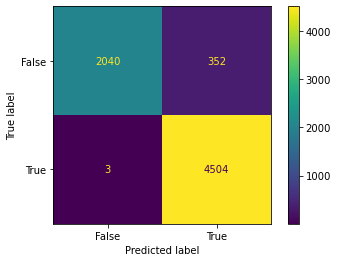

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)

print(f"Accuracy Score:", accuracy_score(y_test, y_pred))
plot_confusion_matrix(logreg, X_test, y_test);

Accuracy Score: 0.8879547760545007


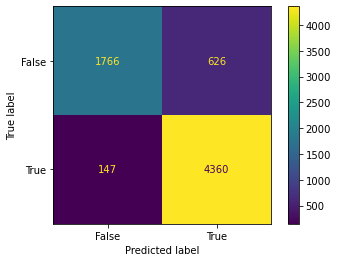

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train, y_train)
kn_y_pred = knnmodel.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, kn_y_pred))
plot_confusion_matrix(knnmodel, X_test, y_test);

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_y_pred

array([ True,  True,  True, ...,  True,  True,  True])